## Boston housing prices

We are going to build a model that can provide a estimated house price

### Things we will cover today
    1. Analyse and explore the Boston house price data
    2. Split the data for training and testing
    3. Run a Multivariable Regression
    4. Evaluate model's coefficients and residuals
    5. Use data transformation to improve model performance
    6. Use model to estimate a property price

### Data characteristics

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX     full-value property-tax rate per 10,000 dollars
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in 1000's dollars
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


### Importing data and begin analysis

#### Creating dictionary with attributes info
We create a dictionary where key is column name in data frame and value is a description of corresponding key. It gives us much clearer plots and easy acces to column names.

In [1]:
info =  """    1. CRIM     per capita crime rate by town
    2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS    proportion of non-retail business acres per town
    4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX      nitric oxides concentration (parts per 10 million)
    6. RM       average number of rooms per dwelling
    7. AGE      proportion of owner-occupied units built prior to 1940
    8. DIS      weighted distances to five Boston employment centres
    9. RAD      index of accessibility to radial highways
    10.TAX     full-value property-tax rate per 10,000 dollars
    11.PTRATIO  pupil-teacher ratio by town
    12.B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13.LSTAT    % lower status of the population
    14.PRICE     House value in 1000's dollars"""

import re

ans = []
rows = info.split('\n')
for i in range(len(rows)):
    rows[i] = rows[i].lstrip().rstrip()
    rows[i] = rows[i][3:]
    rows[i] = rows[i].rstrip()
    ans.append(re.split(r'\s{2,}', rows[i]))
atr_info = {ans[i][0]: ans[i][1] for i in range(len(ans))}
atr_info

{'CRIM': 'per capita crime rate by town',
 'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft.',
 'INDUS': 'proportion of non-retail business acres per town',
 'CHAS': 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 'NOX': 'nitric oxides concentration (parts per 10 million)',
 'RM': 'average number of rooms per dwelling',
 'AGE': 'proportion of owner-occupied units built prior to 1940',
 'DIS': 'weighted distances to five Boston employment centres',
 'RAD': 'index of accessibility to radial highways',
 'TAX': 'full-value property-tax rate per 10,000 dollars',
 'PTRATIO': 'pupil-teacher ratio by town',
 'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
 'LSTAT': '% lower status of the population',
 'PRICE': "House value in 1000's dollars"}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from python_functions.blueprints import scatterplot_blueprint
%matplotlib inline

In [3]:
housing = pd.read_csv('data/boston.csv')

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [5]:
housing.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Remove 'Unnamed: 0' column, it doesn't provide any meaningful data
housing.drop(columns='Unnamed: 0', inplace=True)
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
print(f'Number of NaN values in dataset:\n{housing.isna().sum()}')

Number of NaN values in dataset:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


In [8]:
print(f'Number of duplicated values in dataset: {housing.duplicated().sum()}')

Number of duplicated values in dataset: 0


### Exploring and visualising the data

In [9]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


[Text(0.5, 1.0, 'Price over Crime'),
 (-1.0, 88.9762),
 (2.0, 51.0),
 Text(0.5, 0, 'Crime Rate Per Capita'),
 Text(0, 0.5, 'Price')]

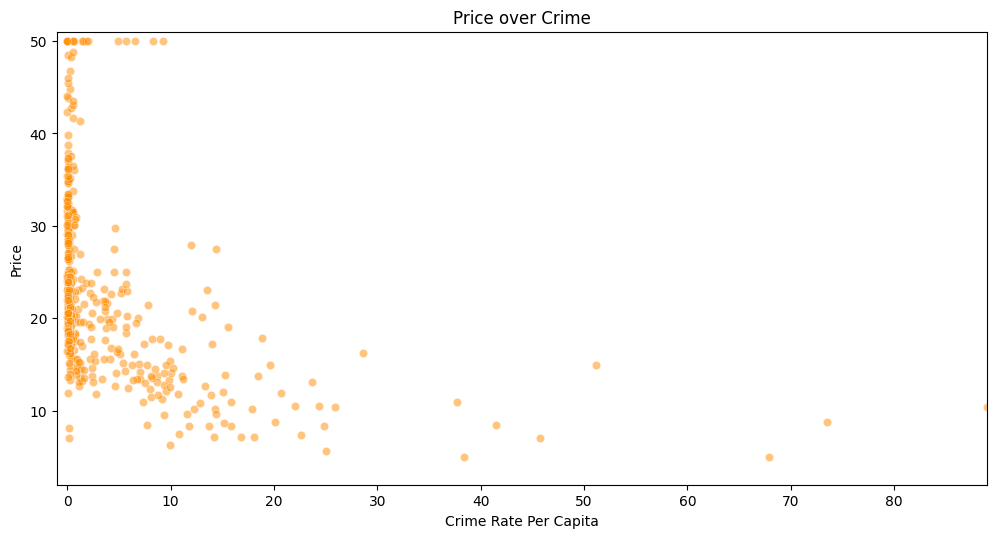

In [31]:
# scatterplot_blueprint(data=housing, y='PRICE', x="CRIM", alpha=0.5, color='darkorange')

plt.figure(figsize=(12,6), dpi=100)

price_crime = sns.scatterplot(data=housing, y='PRICE', x='CRIM', alpha=0.5, color='darkorange')
price_crime.set(title='Price over Crime',
                xlim=(-1,housing['CRIM'].max()),
                ylim=(housing['PRICE'].min()-3,housing['PRICE'].max()+1),
                xlabel='Crime Rate Per Capita',
                ylabel='Price')

In [12]:
atr_info

{'CRIM': 'per capita crime rate by town',
 'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft.',
 'INDUS': 'proportion of non-retail business acres per town',
 'CHAS': 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 'NOX': 'nitric oxides concentration (parts per 10 million)',
 'RM': 'average number of rooms per dwelling',
 'AGE': 'proportion of owner-occupied units built prior to 1940',
 'DIS': 'weighted distances to five Boston employment centres',
 'RAD': 'index of accessibility to radial highways',
 'TAX': 'full-value property-tax rate per 10,000 dollars',
 'PTRATIO': 'pupil-teacher ratio by town',
 'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
 'LSTAT': '% lower status of the population',
 'PRICE': "House value in 1000's dollars"}

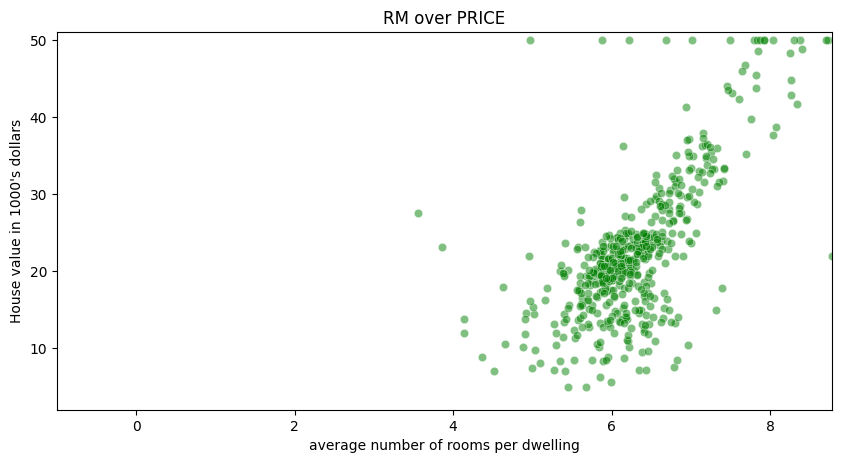

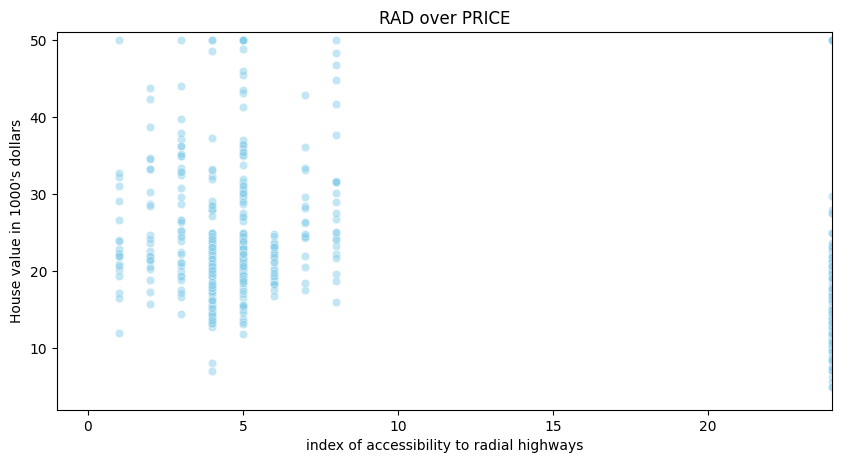

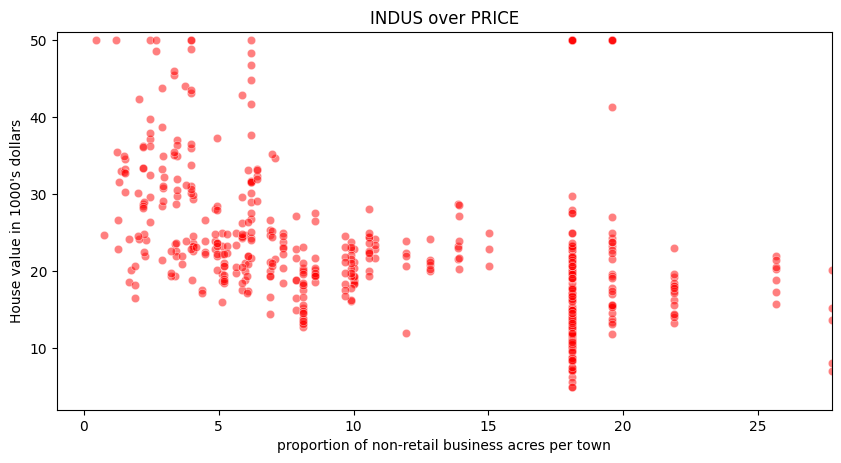

In [19]:
sc

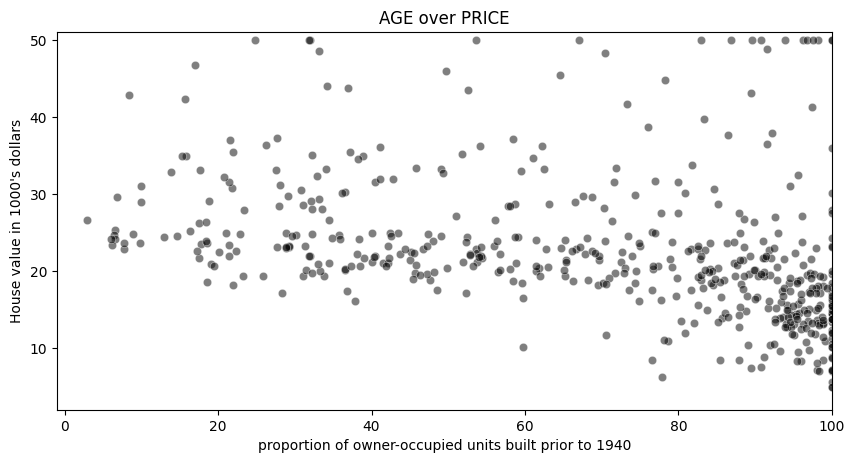

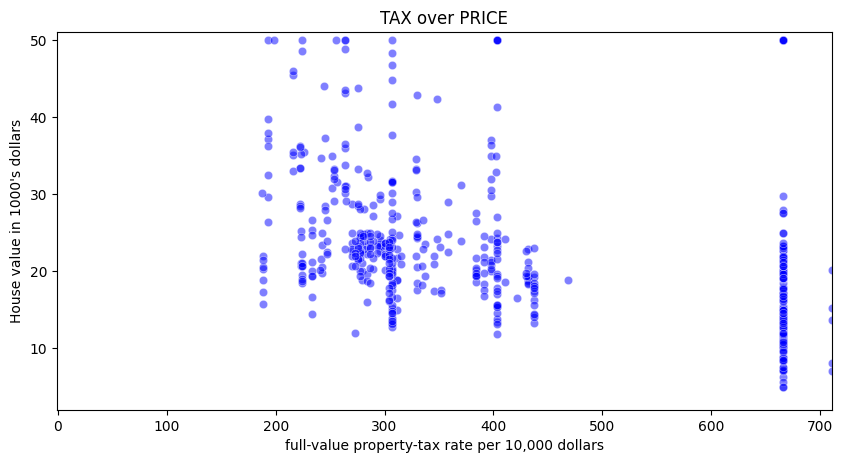

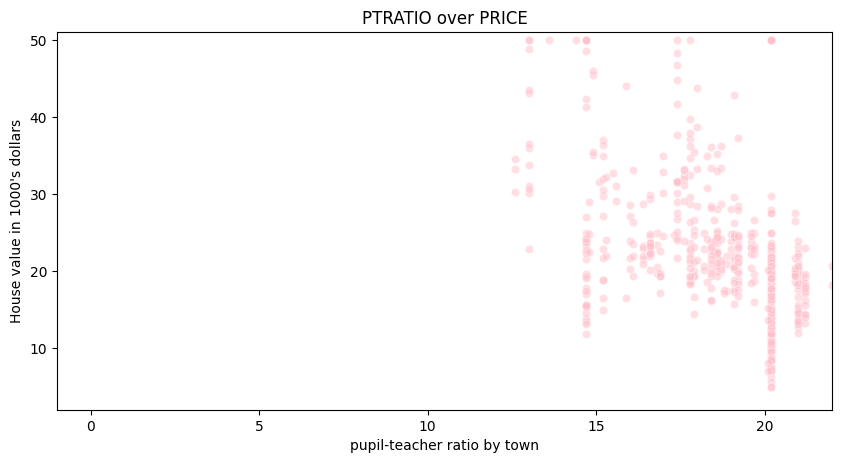

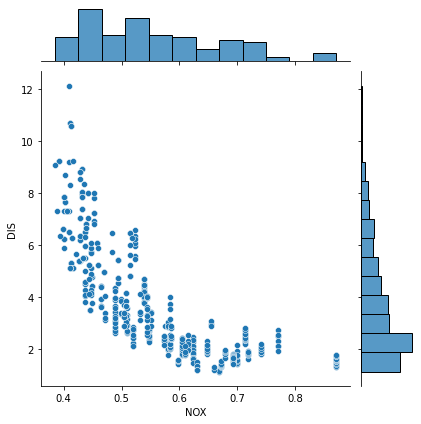

In [29]:
sns.jointplot(data=housing, y='DIS', x='NOX')